<a href="https://colab.research.google.com/github/OwenHimmel/DS2002SQL/blob/main/sqliteHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import sqlite3

connection = sqlite3.connect('student_grades.db')

cursor = connection.cursor()

In [29]:
cursor.execute("DROP TABLE IF EXISTS students")
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')


In [30]:
cursor.execute("DROP TABLE IF EXISTS grades")
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT NOT NULL,
    grade INTEGER NOT NULL,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

In [32]:
student_info = [
    ('Chloe', 'Roberts'),
    ('Owen', 'McKenna'),
    ('Dylan', 'Right'),
    ('William', 'Williams'),
    ('James', 'Brown')
]


# Insert data into the table
cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', student_info)

connection.commit()

In [33]:
grades_data = [
    ('1', 'Balling', '100'),
    ('1', 'Smelting', '87'),
    ('1', 'Intrepretive Dance', '99'),
    ('2', 'Balling', '86'),
    ('2', 'Smelting', '87'),
    ('2', 'Intrepretive Dance', '60'),
    ('3', 'Balling', '56'),
    ('3', 'Smelting', '95'),
    ('3', 'Intrepretive Dance', '84'),
    ('4', 'Balling', '91'),
    ('4', 'Smelting', '82'),
    ('4', 'Intrepretive Dance', '79'),
    ('5', 'Balling', '89'),
    ('5', 'Smelting', '88'),
    ('5', 'Intrepretive Dance', '90'),

]
# Insert data into the flavor_details table
cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)



# Commit the transaction
connection.commit()


In [46]:
cursor.execute('''
    SELECT
        s.first_name,
        s.last_name,
        g.subject,
        g.grade
    FROM
        students s
    JOIN
        grades g ON s.student_id = g.student_id
''')
name_and_grade = cursor.fetchall()

# Print the results
print("Students and their grades:")
for row in name_and_grade:
    fname = row[0]
    lname = row[1]
    subject = row[2]
    grade = row[3]
    print(fname + " " + lname + " " + subject + " grade: " +str(grade))

Students and their grades:
Chloe Roberts Balling grade: 100
Chloe Roberts Smelting grade: 87
Chloe Roberts Intrepretive Dance grade: 99
Owen McKenna Balling grade: 86
Owen McKenna Smelting grade: 87
Owen McKenna Intrepretive Dance grade: 60
Dylan Right Balling grade: 56
Dylan Right Smelting grade: 95
Dylan Right Intrepretive Dance grade: 84
William Williams Balling grade: 91
William Williams Smelting grade: 82
William Williams Intrepretive Dance grade: 79
James Brown Balling grade: 89
James Brown Smelting grade: 88
James Brown Intrepretive Dance grade: 90


In [48]:
cursor.execute('''
    SELECT
        s.first_name,
        s.last_name,
        ROUND(AVG(g.grade), 2) AS average_grade
    FROM
        students s
    JOIN
        grades g ON s.student_id = g.student_id
    GROUP BY
        s.student_id
''')
average_grades = cursor.fetchall()

# Print the results
print("Average grades for each student:")
for row in average_grades:
    fname = row[0]
    lname = row[1]
    average_grade = row[2]
    print(fname + " " + lname + " average grade: " +str(average_grade))

Average grades for each student:
Chloe Roberts average grade: 95.33
Owen McKenna average grade: 77.67
Dylan Right average grade: 78.33
William Williams average grade: 84.0
James Brown average grade: 89.0


In [50]:
cursor.execute('''
    SELECT
        s.first_name,
        s.last_name,
        ROUND(AVG(g.grade), 2) AS average_grade
    FROM
        students s
    JOIN
        grades g ON s.student_id = g.student_id
    GROUP BY
        s.student_id
    ORDER BY
        average_grade DESC
    LIMIT 1
''')
highest_grade = cursor.fetchone()

# Print the results
print("Student with the highest average grade:")
fname = highest_grade[0]
lname = highest_grade[1]
average_grade = highest_grade[2]
print(fname + " " + lname + ", average grade: " +str(average_grade))



Student with the highest average grade:
Chloe Roberts, average grade: 95.33


In [38]:
cursor.execute('''
    SELECT AVG(grade)
    FROM grades
    WHERE subject = 'Balling'
''')
average_balling_grade = cursor.fetchone()[0]

# Print the result
print("Average grade in Balling:", average_balling_grade)


Average grade in Balling: 84.4


In [52]:
cursor.execute('''
    SELECT
        s.first_name,
        s.last_name,
        g.subject,
        g.grade
    FROM
        students s
    JOIN
        grades g ON s.student_id = g.student_id
    WHERE
        g.grade > 90
''')
above_90_students = cursor.fetchall()

# Print the results
print("Students with grades above 90:")
for row in above_90_students:
    fname = row[0]
    lname = row[1]
    subject = row[2]
    grade = row[3]
    print(fname + " " + lname + " in " + subject + ", grade: " +str(grade))

Students with grades above 90:
Chloe Roberts in Balling, grade: 100
Chloe Roberts in Intrepretive Dance, grade: 99
Dylan Right in Smelting, grade: 95
William Williams in Balling, grade: 91


In [40]:
import pandas as pd
cursor.execute('''
    SELECT
        s.first_name,
        s.last_name,
        g.subject,
        g.grade
    FROM
        students s
    JOIN
        grades g ON s.student_id = g.student_id
''')
data = cursor.fetchall()

# Create a pandas DataFrame
df = pd.DataFrame(data, columns=['First Name', 'Last Name', 'Subject', 'Grade'])
print(df)

   First Name Last Name             Subject  Grade
0       Chloe   Roberts             Balling    100
1       Chloe   Roberts            Smelting     87
2       Chloe   Roberts  Intrepretive Dance     99
3        Owen   McKenna             Balling     86
4        Owen   McKenna            Smelting     87
5        Owen   McKenna  Intrepretive Dance     60
6       Dylan     Right             Balling     56
7       Dylan     Right            Smelting     95
8       Dylan     Right  Intrepretive Dance     84
9     William  Williams             Balling     91
10    William  Williams            Smelting     82
11    William  Williams  Intrepretive Dance     79
12      James     Brown             Balling     89
13      James     Brown            Smelting     88
14      James     Brown  Intrepretive Dance     90


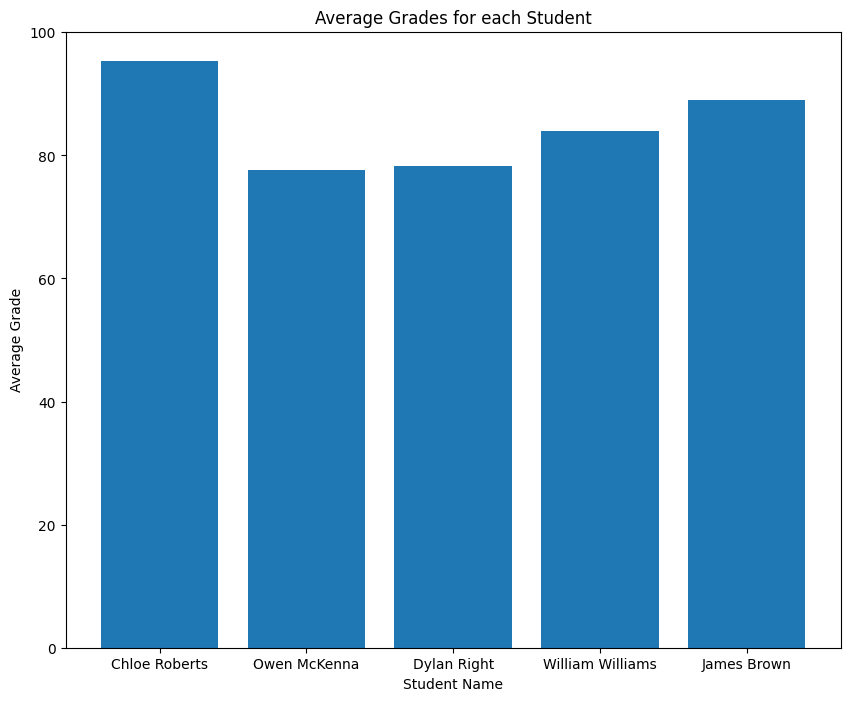

In [63]:
import matplotlib.pyplot as plt
cursor.execute('''
    SELECT
        s.first_name,
        s.last_name,
        AVG(g.grade) AS average_grade
    FROM
        students s
    JOIN
        grades g ON s.student_id = g.student_id
    GROUP BY
        s.student_id
''')
average_grades = cursor.fetchall()


# Extract names and grades
names = [f"{row[0]} {row[1]}" for row in average_grades]
grades = [row[2] for row in average_grades]

# Create the bar chart
plt.figure(figsize=(10, 8))
plt.bar(names, grades)
plt.xlabel("Student Name")
plt.ylabel("Average Grade")
plt.title("Average Grades for each Student")
plt.show()